In [1]:
import sys
sys.path.append("..") 
import numpy as np
import matplotlib.pyplot as plt
from sgd_framework.sgd import SGD
from sgd_framework.parameter_estimator import ParameterEstimator
from sgd_framework.regression_model import RegressionModel
from data.generate_synthetic_data import transform_to_polynomial
from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(0)
d_values = [2,3,4,5]
l_values = [2,3]
s = 0.0
noise = 0.0
max_n = 5000  
stepsize_methods = ["fixed", "halving", "diminishing"]

results = {}

In [3]:
for d in d_values:
    for l in l_values:
        print(f"\n=== Running for d={d}, l={l} ===")

        lower_threshold_n = int((d)**(l+s))
        upper_threshold_n = int((d + 1)**(l + 1 + s))
        ns = np.unique(np.logspace(np.log10(lower_threshold_n / 2), np.log10(upper_threshold_n * 2), num=10, dtype=int))
        ns = [n for n in ns if n >= 5]

        X_raw = np.random.normal(0, 1, size=(max_n, d))
        X_true_poly = transform_to_polynomial(X_raw, degree=l, normalize=True)

        true_A = 0.001 * np.arange(1, X_true_poly.shape[1] + 1)
        true_b = 1.0
        y_full = X_true_poly @ true_A + true_b + np.random.normal(0, noise, size=max_n)

        results[(d, l)] = {method: {"train": [], "test": [], "ns": ns, "weights": []} for method in stepsize_methods}

        for n in ns:
            X_n = X_raw[:n]
            y_n = y_full[:n]
            X_poly_n = transform_to_polynomial(X_n, degree=l, normalize=True)

            X_train, X_test, y_train, y_test = train_test_split(X_poly_n, y_n, test_size=0.3)

            for method in stepsize_methods:
                model = RegressionModel(X_train, y_train)
                sgd = SGD(model=model, num_iterations=n, batch_size=1, noise=noise, stepsize_type=method)
                w, obj, grad, dist = sgd.optimize()

                results[(d, l)][method]["weights"].append(w)
                results[(d, l)][method]["train"].append(obj[-1])
                test_pred = X_test @ w[1:] + w[0]
                test_loss = np.mean((test_pred - y_test) ** 2)
                results[(d, l)][method]["test"].append(test_loss)

                print(f"d={d}, l={l}, n={n}, {method}: Train Loss={obj[-1]:.4f}, Test Loss={test_loss:.4f}")


=== Running for d=2, l=2 ===
d=2, l=2, n=6, fixed: Train Loss=0.1699, Test Loss=1.4747
d=2, l=2, n=6, halving: Train Loss=0.1704, Test Loss=1.8084
d=2, l=2, n=6, diminishing: Train Loss=0.1734, Test Loss=1.4533
d=2, l=2, n=8, fixed: Train Loss=0.1350, Test Loss=0.7848
d=2, l=2, n=8, halving: Train Loss=0.0815, Test Loss=0.2768
d=2, l=2, n=8, diminishing: Train Loss=0.0652, Test Loss=0.7069
d=2, l=2, n=12, fixed: Train Loss=0.2343, Test Loss=0.9304
d=2, l=2, n=12, halving: Train Loss=0.2673, Test Loss=0.5404
d=2, l=2, n=12, diminishing: Train Loss=0.2101, Test Loss=0.5418
d=2, l=2, n=18, fixed: Train Loss=0.2328, Test Loss=0.4233
d=2, l=2, n=18, halving: Train Loss=0.2801, Test Loss=0.6538
d=2, l=2, n=18, diminishing: Train Loss=0.2389, Test Loss=0.5438
d=2, l=2, n=25, fixed: Train Loss=0.0792, Test Loss=0.2514
d=2, l=2, n=25, halving: Train Loss=0.1249, Test Loss=0.4752
d=2, l=2, n=25, diminishing: Train Loss=0.1294, Test Loss=0.2053
d=2, l=2, n=37, fixed: Train Loss=0.0527, Test Loss

In [10]:
# Comparison of weights
d = 3
l_values = [2, 3]
ns2 = [6, 10, 20, 50, 80, 100, 150, 200, 300, 500]

X_raw = np.random.normal(0, 1, size=(max_n, d))
X_true_poly = transform_to_polynomial(X_raw, degree=3, normalize=True)
true_A = 0.001 * np.arange(1, X_true_poly.shape[1] + 1)
true_b = 1.0
y_full = X_true_poly @ true_A + true_b + np.random.normal(0, noise, size=max_n)

results2 = {}
for l in l_values:
    print(f"\n=== Running for d={d}, l={l} ===")
    results2[(d, l)] = {method: {"train": [], "test": [], "ns": ns2, "weights": []} for method in stepsize_methods}
    
    for n in ns2:
        X_n = X_raw[:n]
        y_n = y_full[:n]
        X_poly_n = transform_to_polynomial(X_n, degree=l, normalize=True)

        X_train, X_test, y_train, y_test = train_test_split(X_poly_n, y_n, test_size=0.3)

        for method in stepsize_methods:
            model = RegressionModel(X_train, y_train)
            sgd = SGD(model=model, num_iterations=n, batch_size=1, noise=noise, stepsize_type=method)
            w, obj, grad, dist = sgd.optimize()

            results2[(d, l)][method]["weights"].append(w)
            results2[(d, l)][method]["train"].append(obj[-1])
            test_pred = X_test @ w[1:] + w[0]
            test_loss = np.mean((test_pred - y_test) ** 2)
            results2[(d, l)][method]["test"].append(test_loss)

            print(f"d={d}, l={l}, n={n}, {method}: Train Loss={obj[-1]:.4f}, Test Loss={test_loss:.4f}")


=== Running for d=3, l=2 ===
d=3, l=2, n=6, fixed: Train Loss=0.4575, Test Loss=1.0299
d=3, l=2, n=6, halving: Train Loss=0.4593, Test Loss=1.0251
d=3, l=2, n=6, diminishing: Train Loss=0.4754, Test Loss=0.9057
d=3, l=2, n=10, fixed: Train Loss=0.4382, Test Loss=0.8027
d=3, l=2, n=10, halving: Train Loss=0.4068, Test Loss=0.9377
d=3, l=2, n=10, diminishing: Train Loss=0.4056, Test Loss=1.1902
d=3, l=2, n=20, fixed: Train Loss=0.2922, Test Loss=0.8036
d=3, l=2, n=20, halving: Train Loss=0.3040, Test Loss=0.6395
d=3, l=2, n=20, diminishing: Train Loss=0.2869, Test Loss=0.8002
d=3, l=2, n=50, fixed: Train Loss=0.0695, Test Loss=0.2227
d=3, l=2, n=50, halving: Train Loss=0.0712, Test Loss=0.1951
d=3, l=2, n=50, diminishing: Train Loss=0.0536, Test Loss=0.1996
d=3, l=2, n=80, fixed: Train Loss=0.0217, Test Loss=0.0587
d=3, l=2, n=80, halving: Train Loss=0.0184, Test Loss=0.0385
d=3, l=2, n=80, diminishing: Train Loss=0.0622, Test Loss=0.1702
d=3, l=2, n=100, fixed: Train Loss=0.0096, Test 

In [11]:
def compare_deg3_to_deg2_weights(d, results, method="fixed", delta=1e-3):
    ns_deg3 = results[(d, 3)][method]["ns"]
    ns_deg2 = results[(d, 2)][method]["ns"]
    weights_deg3 = results[(d, 3)][method]["weights"]
    weights_deg2 = results[(d, 2)][method]["weights"]

    print(f"Comparison of degree 3 to degree 2 weights (d = {d}, method = '{method}') \n")
    for n in ns:
        idx_3 = ns_deg3.index(n)
        idx_2 = ns_deg2.index(n)

        w3 = weights_deg3[idx_3]
        w2 = weights_deg2[idx_2]

        w2_main = w2[1:]
        w3_main = w3[1:len(w2_main)+1] 

        diff = np.abs(w3_main - w2_main)
        significant_diff = diff[diff > delta]
        sum_diff = np.sum(significant_diff)

        print(f"n = {n} | Significant diff terms: {len(significant_diff)} | Sum = {sum_diff:.6f} | Difference by coefficient = {sum_diff/(len(significant_diff)):.6f}")

In [12]:
compare_deg3_to_deg2_weights(d=3, results=results)


Comparison of degree 3 to degree 2 weights (d = 3, method = 'fixed') 

n = 6 | Significant diff terms: 9 | Sum = 0.598614 | Difference by coefficient = 0.066513
n = 10 | Significant diff terms: 9 | Sum = 0.397831 | Difference by coefficient = 0.044203
n = 20 | Significant diff terms: 9 | Sum = 0.672689 | Difference by coefficient = 0.074743
n = 50 | Significant diff terms: 9 | Sum = 0.563389 | Difference by coefficient = 0.062599
n = 80 | Significant diff terms: 9 | Sum = 0.455714 | Difference by coefficient = 0.050635
n = 100 | Significant diff terms: 9 | Sum = 0.285287 | Difference by coefficient = 0.031699
n = 150 | Significant diff terms: 8 | Sum = 0.267611 | Difference by coefficient = 0.033451
n = 200 | Significant diff terms: 9 | Sum = 0.177145 | Difference by coefficient = 0.019683
n = 300 | Significant diff terms: 9 | Sum = 0.293214 | Difference by coefficient = 0.032579
n = 500 | Significant diff terms: 8 | Sum = 0.249754 | Difference by coefficient = 0.031219


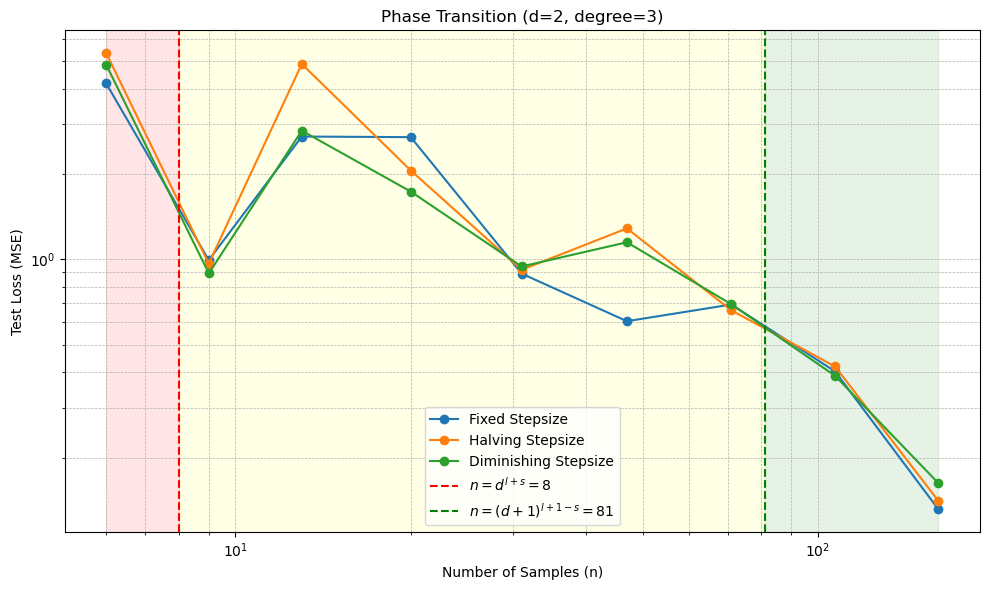

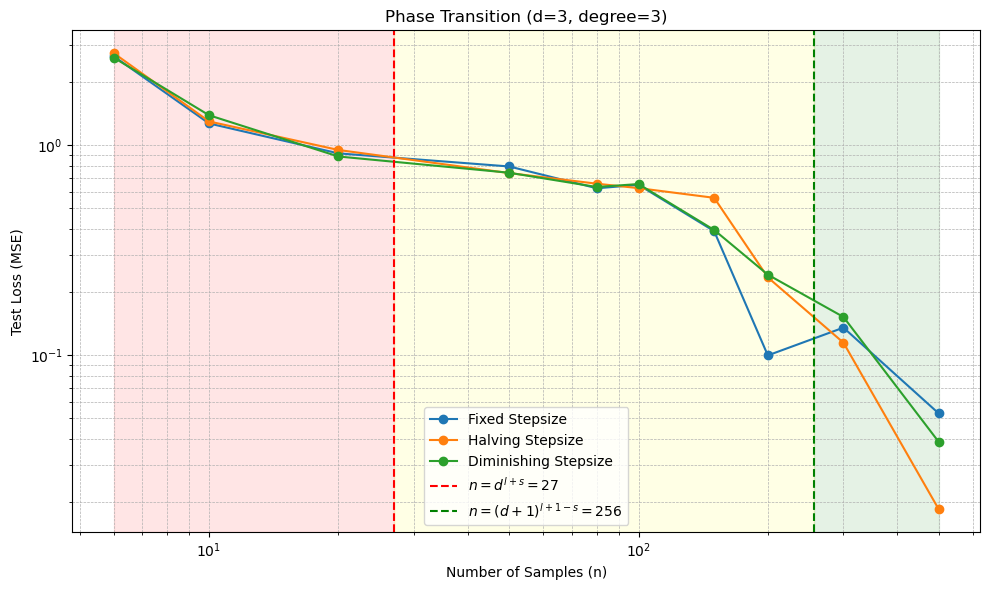

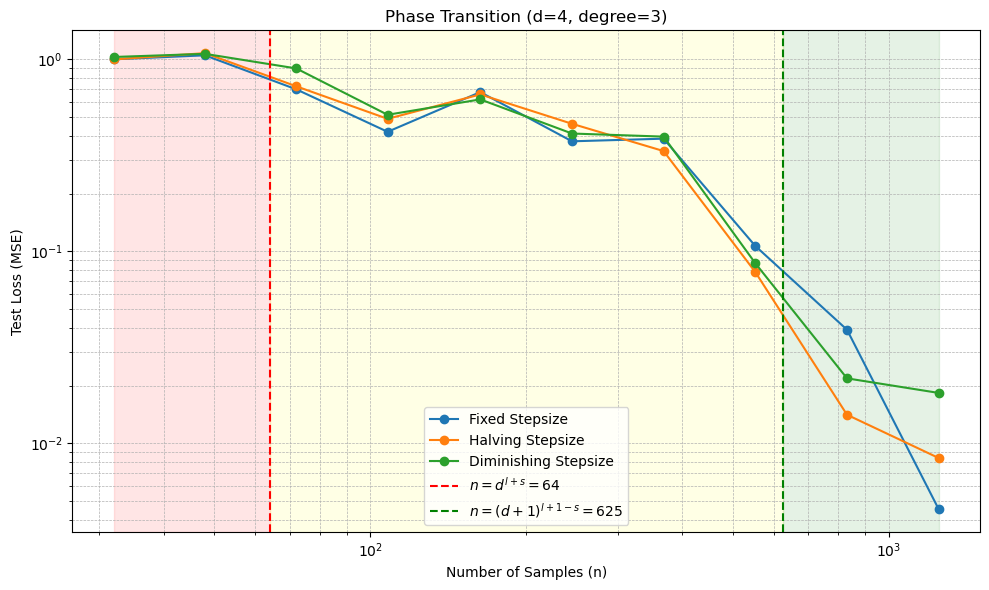

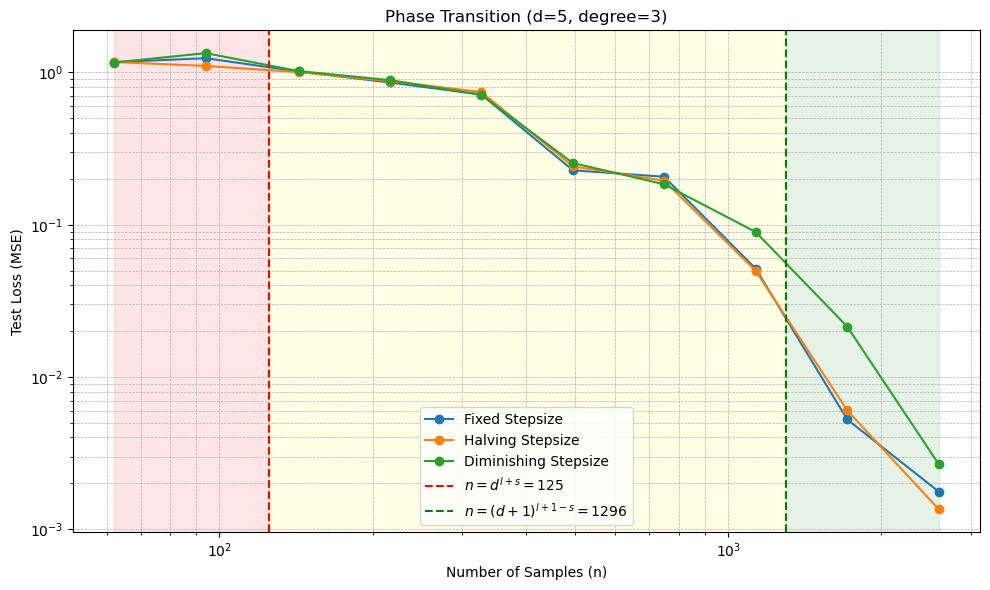

In [13]:
for (d_plot, l_plot) in [(2, 3), (3, 3), (4, 3), (5, 3)]:
    ns_plot = results[(d_plot, l_plot)]["fixed"]["ns"]

    plt.figure(figsize=(10, 6))
    for method in stepsize_methods:
        test_losses_plot = results[(d_plot, l_plot)][method]["test"]
        plt.plot(ns_plot, test_losses_plot, label=f"{method.capitalize()} Stepsize", marker='o')

    lower_threshold_n = d_plot ** (l_plot + s)
    upper_threshold_n = (d_plot + 1) ** (l_plot + 1 - s)

    plt.axvline(lower_threshold_n, color='red', linestyle='--', label=f"$n = d^{{l+s}} = {int(lower_threshold_n)}$")
    plt.axvline(upper_threshold_n, color='green', linestyle='--', label=f"$n = (d+1)^{{l+1-s}} = {int(upper_threshold_n)}$")
    plt.axvspan(ns_plot[0], lower_threshold_n, color='red', alpha=0.1)
    plt.axvspan(lower_threshold_n, upper_threshold_n, color='yellow', alpha=0.1)
    plt.axvspan(upper_threshold_n, ns_plot[-1], color='green', alpha=0.1)

    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Number of Samples (n)")
    plt.ylabel("Test Loss (MSE)")
    plt.title(f"Phase Transition (d={d_plot}, degree={l_plot})")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()
    plt.show()
